In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

In [86]:
predictor = pd.read_csv("linearX.csv", header=None).values.flatten()
response = pd.read_csv("linearY.csv", header=None).values.flatten()

predictor = normalize(predictor)

X = np.c_[np.ones(predictor.shape[0]), predictor]
y = response

In [88]:
def initialize_params(n):
    return np.zeros(n)

In [90]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * (X.T @ (X @ theta - y))
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [98]:

learning_rate = 0.5
iterations = 50
initial_theta = initialize_params(X.shape[1])


final_theta, cost_history = gradient_descent(X, y, initial_theta, learning_rate, iterations)

Final Cost: 1.1947898109836577e-06
Final Parameters: [0.9966201 0.0013402]
Advantage of Averaging Cost: Averaging the cost ensures that the gradient updates are scaled appropriately, making the optimization process independent of the dataset size.


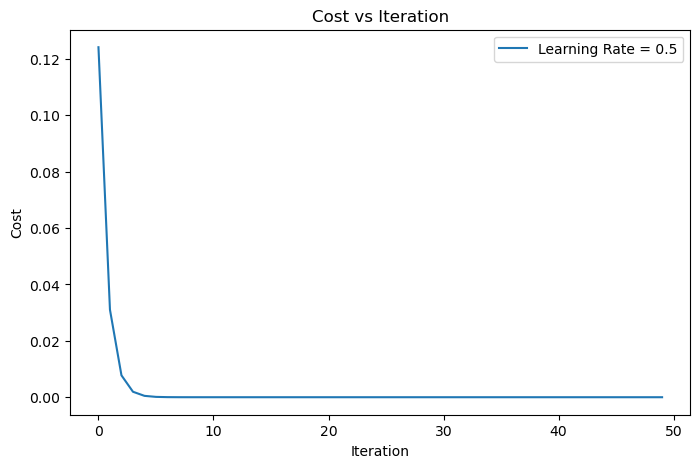

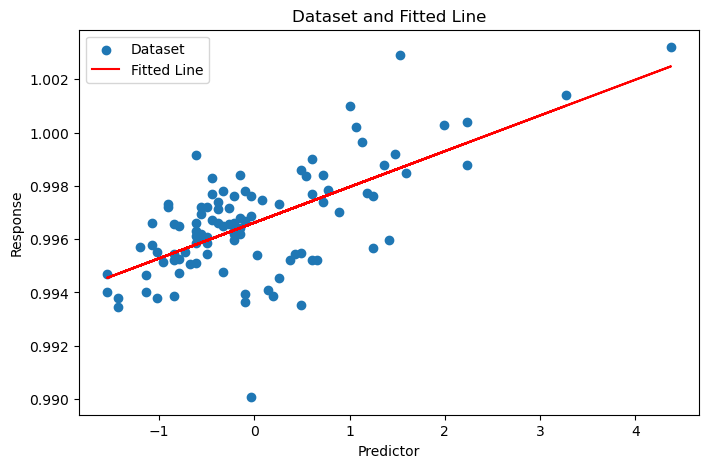

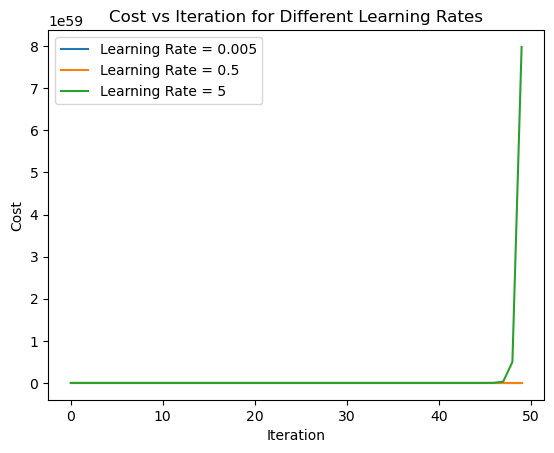

In [100]:
# Question 1: Final cost and parameters
final_cost = compute_cost(X, y, final_theta)
print("Final Cost:", final_cost)
print("Final Parameters:", final_theta)

# Question 2: Advantage of averaging cost
advantage = "Averaging the cost ensures that the gradient updates are scaled appropriately, making the optimization process independent of the dataset size."
print("Advantage of Averaging Cost:", advantage)

# Question 3: Cost vs Iteration Plot
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, label="Learning Rate = 0.5")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.legend()
plt.show()

# Question 4: Plot dataset and fitted line
plt.figure(figsize=(8, 5))
plt.scatter(predictor, response, label="Dataset")
plt.plot(predictor, X @ final_theta, color="red", label="Fitted Line")
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.title("Dataset and Fitted Line")
plt.legend()
plt.show()

# Question 5: Learning rates comparison
learning_rates = [0.005, 0.5, 5]

for lr in learning_rates:
    theta = initialize_params(X.shape[1])
    _, cost_hist = gradient_descent(X, y, theta, lr, iterations)
    plt.plot(range(iterations), cost_hist, label=f"Learning Rate = {lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration for Different Learning Rates")
plt.legend()
plt.show()

# Question 6: Stochastic and Mini-batch Gradient Descent

def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            gradient = (xi.T @ (xi @ theta - yi))
            theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


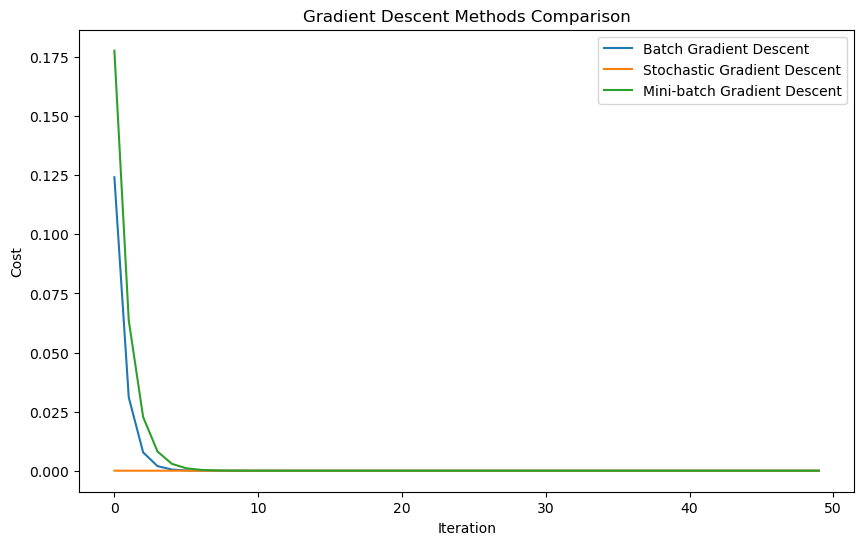

In [101]:
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            gradient = (1 / batch_size) * (X_batch.T @ (X_batch @ theta - y_batch))
            theta -= learning_rate * gradient

        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Parameters for comparison
batch_size = 10

# Stochastic Gradient Descent
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y, initialize_params(X.shape[1]), 0.05, iterations)

# Mini-batch Gradient Descent
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X, y, initialize_params(X.shape[1]), 0.05, iterations, batch_size)

# Plot comparisons
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label="Batch Gradient Descent")
plt.plot(range(iterations), cost_sgd, label="Stochastic Gradient Descent")
plt.plot(range(iterations), cost_mbgd, label="Mini-batch Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Gradient Descent Methods Comparison")
plt.legend()
plt.show()
